<a href="https://colab.research.google.com/github/Ducmono/Machine-Learning-Classification-CNN-Regression/blob/main/Airquanity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Added Ridge and Lasso
from sklearn.ensemble import RandomForestRegressor # trả về trung bình cộng của số cây
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Airquanity/GlobalWeatherRepository.csv')
print(df.shape)
df.head(1000)
# df.describe()

(85154, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Brunei Darussalam,Bandar Seri Begawan,4.88,114.93,Asia/Brunei,1716216300,2024-05-20 22:45,27.0,80.6,Partly cloudy,...,8.0,8.2,1,1,06:06 AM,06:27 PM,03:53 PM,03:26 AM,Waxing Gibbous,88
996,Bulgaria,Sofia,42.68,23.32,Europe/Sofia,1716215400,2024-05-20 17:30,19.0,66.2,Overcast,...,3.7,4.9,1,1,05:59 AM,08:48 PM,05:49 PM,04:14 AM,Waxing Gibbous,88
997,Burkina Faso,Ouagadougou,12.37,-1.52,Africa/Ouagadougou,1716216300,2024-05-20 14:45,38.0,100.4,Partly cloudy,...,25.1,124.7,2,3,05:41 AM,06:25 PM,03:59 PM,03:19 AM,Waxing Gibbous,88
998,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1716216300,2024-05-20 16:45,21.0,69.8,Patchy rain nearby,...,2.6,7.3,1,1,06:01 AM,05:58 PM,03:39 PM,03:22 AM,Waxing Gibbous,88


In [ ]:
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85154 entries, 0 to 85153
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       85154 non-null  object 
 1   location_name                 85154 non-null  object 
 2   latitude                      85154 non-null  float64
 3   longitude                     85154 non-null  float64
 4   timezone                      85154 non-null  object 
 5   last_updated_epoch            85154 non-null  int64  
 6   last_updated                  85154 non-null  object 
 7   temperature_celsius           85154 non-null  float64
 8   temperature_fahrenheit        85154 non-null  float64
 9   condition_text                85154 non-null  object 
 10  wind_mph                      85154 non-null  float64
 11  wind_kph                      85154 non-null  float64
 12  wind_degree                   85154 non-null  int64  
 13  w

In [ ]:
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)

# Show the last 50 unique values
unique_countries=df['country'].nunique()
num_unique_countries=df['country'].unique()[-50:]
print(f'Num Unique countries are: {unique_countries}')
print(f'There are {num_unique_countries} unique values in the country column.')

Num Unique countries are: 205
There are ['South Africa' 'South Korea' 'Sudan' 'Spain' 'Sri Lanka' 'Suriname'
 'Sweden' 'Switzerland' 'Syria' 'Tajikistan' 'Tanzania' 'Timor-Leste'
 'Tonga' 'Trinidad and Tobago' 'Tunisia' 'Turkmenistan' 'Tuvalu' 'Uganda'
 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States of America' 'Uruguay' 'Uzbekistan' 'Vanuatu' 'Venezuela'
 'Vietnam' 'Yemen' 'Zambia' 'Zimbabwe' 'Colombia'
 'USA United States of America' "Lao People's Democratic Republic" 'Libya'
 'Kosovo' 'Togo' 'Malásia' 'Komoren' 'Estonie' 'Inde' 'Letonia' 'Mexique'
 'Polônia' 'Marrocos' 'Saint-Vincent-et-les-Grenadines' 'Saudi Arabien'
 'Südkorea' 'Bélgica' 'Turkménistan' 'Jemen'] unique values in the country column.


In [ ]:
missing = df.isnull().sum()
print("🔎 Missing values per column:")
print(missing[missing > 0])

# Convert 'time' column to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])
# Create a newdate 'date' column (only date part)
# df['time_up'] = df['last_updated'].dt.time
# df['last_updated'] = df['last_updated'].dt.date
df = df.sort_values('last_updated')
# df['country_city'] = df['country'] + '-' + df['location_name']

columns_to_drop = ['timezone','wind_kph',
                   'wind_mph', 'wind_degree','temperature_fahrenheit',
                   'pressure_in','condition_text','wind_direction','feels_like_celsius',
                   'precip_mm', 'precip_in', 'cloud', 'feels_like_fahrenheit',
                   'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph',
                   'gust_kph', 'air_quality_Ozone',
                   'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
                   'moon_illumination', 'last_updated_epoch'] # Added last_updated_epoch to the list

df = df.drop(columns=columns_to_drop, axis=1)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()

# Convert 'date' column to datetime format
negative_values = (df.select_dtypes(include='number') < 0).sum()
print("\n🔻 Số lượng giá trị âm trong mỗi cột:")
print(negative_values[negative_values > 0])
cols_to_check = [
    'air_quality_PM10',
    'air_quality_Carbon_Monoxide',
    'air_quality_Sulphur_dioxide'
]
df = df[~(df[cols_to_check] < 0).any(axis=1)]
# Final check after processing
print("\n✅ Dataset after cleaning:")
df.info()
df.head()

🔎 Missing values per column:
Series([], dtype: int64)

🔁 Number of duplicate rows: 0

🔻 Số lượng giá trị âm trong mỗi cột:
latitude                       18779
longitude                      23508
temperature_celsius             1370
air_quality_Carbon_Monoxide        1
air_quality_Sulphur_dioxide        1
air_quality_PM10                   1
dtype: int64

✅ Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 85151 entries, 186 to 85107
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       85151 non-null  object        
 1   location_name                 85151 non-null  object        
 2   latitude                      85151 non-null  float64       
 3   longitude                     85151 non-null  float64       
 4   last_updated                  85151 non-null  datetime64[ns]
 5   temperature_celsius           85151 non-nu

,country,location_name,latitude,longitude,last_updated,temperature_celsius,pressure_mb,humidity,air_quality_Carbon_Monoxide,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
186,United States of America,Washington Park,46.60,-120.49,2024-05-16 01:45:00,16.1,1012.0,58,198.6,2.5,0.2,6.3,7.1,1,1
40,Costa Rica,San Juan,9.97,-84.08,2024-05-16 02:45:00,21.0,1016.0,100,1161.6,10.9,6.6,21.7,23.3,2,2
110,Mexico,Mexico City,19.43,-99.13,2024-05-16 02:45:00,20.8,1013.0,47,974.7,48.7,16.9,35.1,48.0,2,3
52,El Salvador,San Salvador,13.71,-89.20,2024-05-16 02:45:00,26.0,1010.0,94,460.6,7.7,7.5,20.4,28.1,2,2
68,Guatemala,Guatemala City,14.62,-90.53,2024-05-16 02:45:00,20.0,1019.0,88,2243.0,35.0,19.3,132.0,178.1,4,10


In [ ]:
# Top 10 provinces by record count
print("Top 10 provinces by record count:")
print(df['country'].value_counts().head(10))


Top 10 provinces by record count:
country
Bulgaria      908
Indonesia     877
Turkey        875
Iran          874
Sudan         874
Madagascar    873
Thailand      873
Belgium       873
Bolivia       867
Vietnam       826
Name: count, dtype: int64


/tmp/ipython-input-74894297.py:21: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


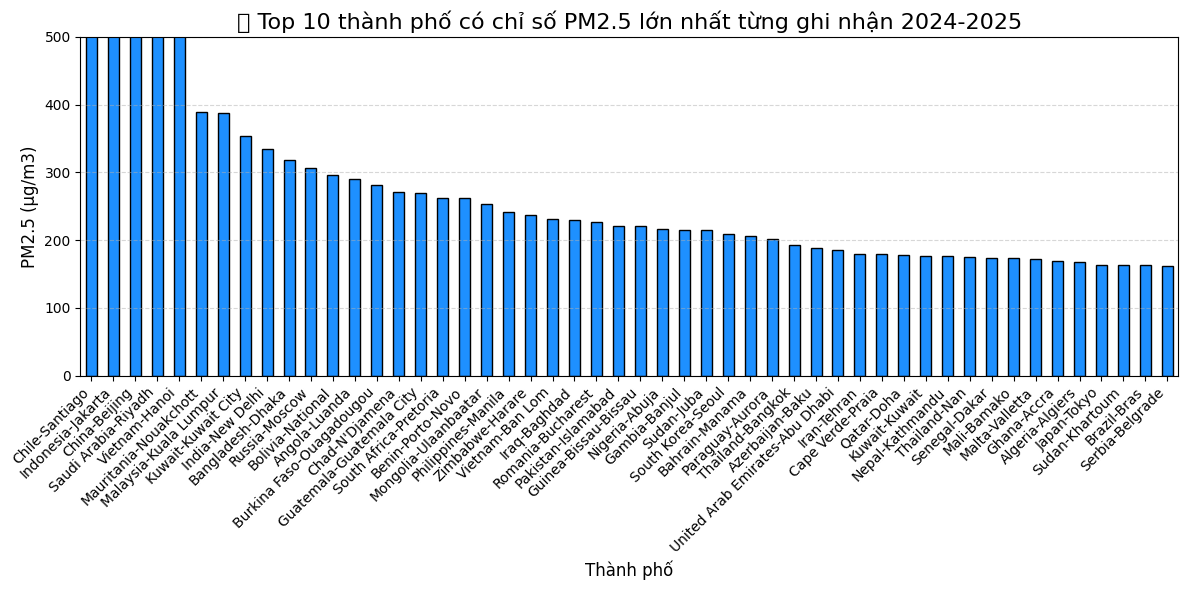

In [ ]:
import matplotlib.pyplot as plt

# Chuẩn hóa tên thành phố (nếu chưa làm)
df_country_city = df.copy()
df_country_city['country_city'] = df_country_city['country'] + '-' + df_country_city['location_name']
df_country_city['country_city'] = df_country_city['country_city'].str.strip().str.title()

# Lấy lượng mưa cao nhất từng ghi nhận theo từng thành phố
rain_max_country_city = df_country_city.groupby('country_city')['air_quality_PM2.5'].max().sort_values(ascending=False).head(50)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
rain_max_country_city.plot(kind='bar', color='dodgerblue', edgecolor='black')

plt.title('🌧️ Top 10 thành phố có chỉ số PM2.5 lớn nhất từng ghi nhận 2024-2025', fontsize=16)
plt.xlabel('Thành phố', fontsize=12)
plt.ylabel('PM2.5 (µg/m3)', fontsize=12)
plt.ylim(0, 500)  # 💡 Đặt giới hạn trục Y lên tới 90mm hoặc 100mm để nhìn rõ
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-821881687.py:22: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-821881687.py:22: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


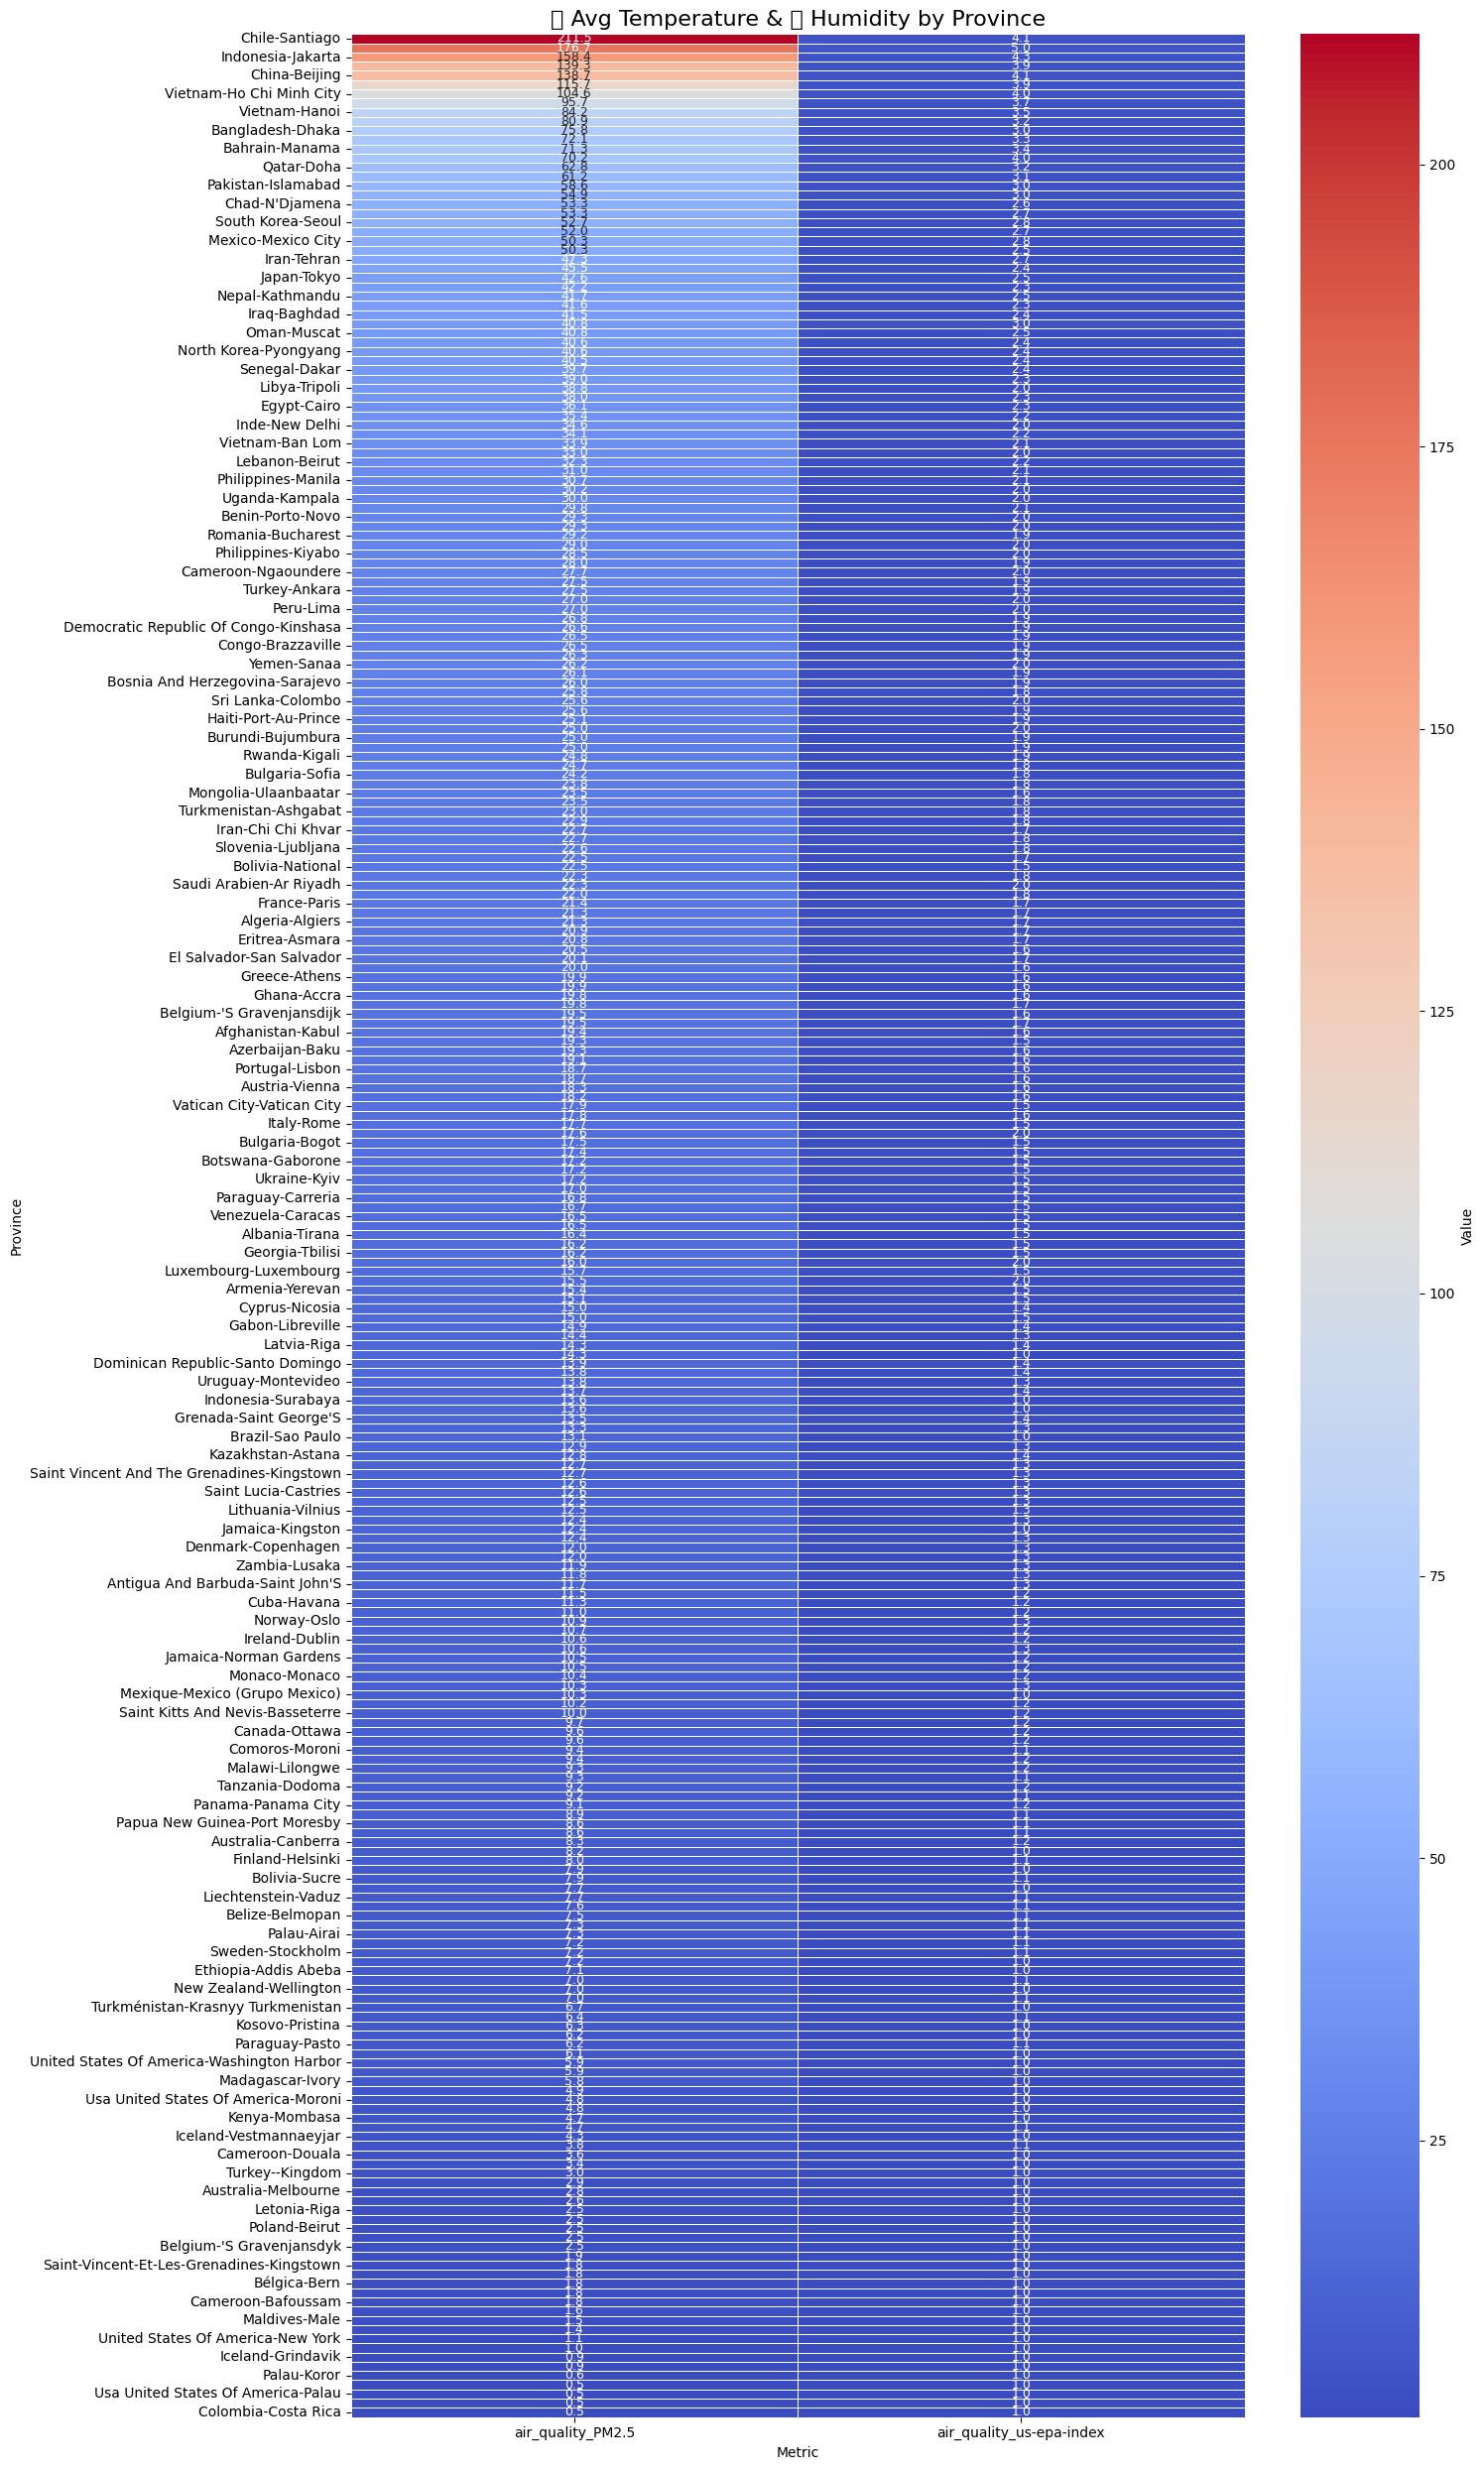

In [ ]:
heatmap_data = df_country_city.groupby('country_city')[['air_quality_PM2.5', 'air_quality_us-epa-index']].mean()

# Sort by temperature for visual clarity
heatmap_data = heatmap_data.sort_values(by='air_quality_PM2.5', ascending=False)

# Draw heatmap with better spacing and font size
plt.figure(figsize=(15, 25))  # Chiều cao lớn hơn
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.4,
    annot_kws={"size": 9},  # Nhỏ hơn mặc định
    cbar_kws={"label": "Value"},
    linecolor='white'
)

plt.title("🌡️ Avg Temperature & 💧 Humidity by Province", fontsize=16)
plt.xlabel("Metric")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

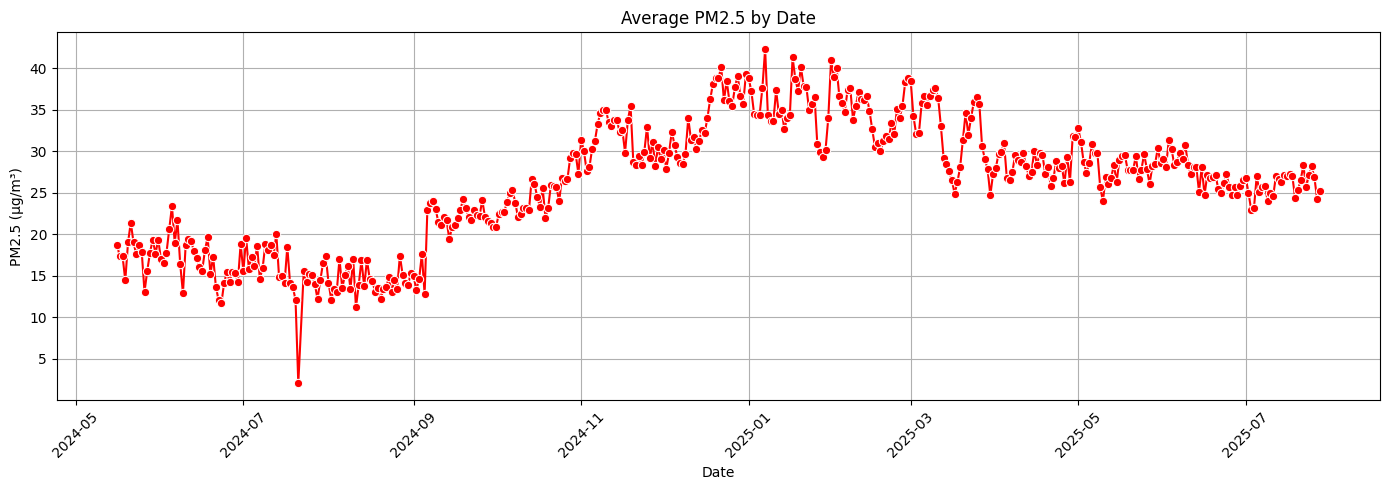

In [ ]:
df_country_city['last_updated'] = pd.to_datetime(df_country_city['last_updated'])
df_country_city['time_up'] = df_country_city['last_updated'].dt.time
df_country_city['date'] = df_country_city['last_updated'].dt.date

daily_avg = df_country_city.groupby('date')[['air_quality_PM2.5']].mean().reset_index()

# Plot air_quality_PM2.5 over time
plt.figure(figsize=(14,5))
sns.lineplot(data=daily_avg, x='date', y='air_quality_PM2.5', marker='o', color='red')
plt.title('Average PM2.5 by Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


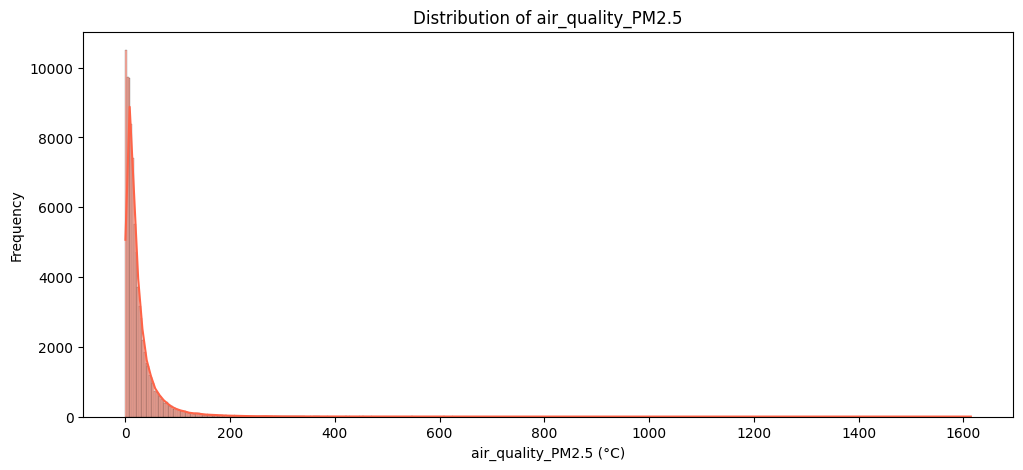

In [ ]:
# Temperature distribution
plt.figure(figsize=(12,5))
sns.histplot(df['air_quality_PM2.5'], bins=500, kde=True, color='tomato')
plt.title('Distribution of air_quality_PM2.5')
plt.xlabel('air_quality_PM2.5 (°C)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85151 entries, 186 to 85107
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       85151 non-null  object        
 1   location_name                 85151 non-null  object        
 2   latitude                      85151 non-null  float64       
 3   longitude                     85151 non-null  float64       
 4   last_updated                  85151 non-null  datetime64[ns]
 5   temperature_celsius           85151 non-null  float64       
 6   pressure_mb                   85151 non-null  float64       
 7   humidity                      85151 non-null  int64         
 8   air_quality_Carbon_Monoxide   85151 non-null  float64       
 9   air_quality_Nitrogen_dioxide  85151 non-null  float64       
 10  air_quality_Sulphur_dioxide   85151 non-null  float64       
 11  air_quality_PM2.5             8

In [ ]:
def detect_anomalies(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 9.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"📍 {column}: Detected {len(outliers)} anomalies")
    print(Q1,Q3)
    print(lower,upper)
    return outliers

# Apply to key columns
anomalies_temp = detect_anomalies(df, 'air_quality_PM2.5')

# Combine all anomalies
all_anomalies = pd.concat([anomalies_temp]).drop_duplicates()
df = df[~df.index.isin(anomalies_temp.index)]
print("🔎 Total unique anomalies:", all_anomalies.shape[0])
# Display some samples
all_anomalies[['air_quality_PM2.5']].head()
df.info()

📍 air_quality_PM2.5: Detected 355 anomalies
7.0 30.34
-28.009999999999998 252.07
🔎 Total unique anomalies: 355
<class 'pandas.core.frame.DataFrame'>
Index: 84796 entries, 186 to 85107
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       84796 non-null  object        
 1   location_name                 84796 non-null  object        
 2   latitude                      84796 non-null  float64       
 3   longitude                     84796 non-null  float64       
 4   last_updated                  84796 non-null  datetime64[ns]
 5   temperature_celsius           84796 non-null  float64       
 6   pressure_mb                   84796 non-null  float64       
 7   humidity                      84796 non-null  int64         
 8   air_quality_Carbon_Monoxide   84796 non-null  float64       
 9   air_quality_Nitrogen_dioxide  84796 non-null  float6

In [ ]:
df.describe()

,latitude,longitude,last_updated,temperature_celsius,pressure_mb,humidity,air_quality_Carbon_Monoxide,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
count,84796.000000,84796.000000,84796,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000
mean,19.184218,22.110346,2024-12-22 03:00:39.270720512,22.615017,1013.956283,63.719987,494.217685,15.056473,11.087218,24.498838,49.355855,1.741096,2.738242
min,-41.300000,-175.200000,2024-05-16 01:45:00,-24.900000,947.000000,2.000000,81.000000,0.000000,0.000000,0.168000,0.168000,1.000000,1.000000
25%,3.750000,-6.836100,2024-09-04 08:00:00,17.600000,1010.000000,46.000000,233.700000,1.200000,0.800000,6.900000,10.300000,1.000000,1.000000
50%,17.250000,23.316700,2024-12-22 11:15:00,25.000000,1013.000000,69.000000,325.600000,4.255000,2.405000,14.800000,21.830000,1.000000,2.000000
75%,40.400000,50.580000,2025-04-10 17:15:00,28.400000,1017.000000,83.000000,503.200000,16.835000,8.880000,29.970000,46.500000,2.000000,3.000000
max,64.150000,179.220000,2025-07-28 21:30:00,49.200000,3006.000000,100.000000,14733.400000,357.050000,521.330000,251.600000,2784.250000,6.000000,10.000000
std,24.437786,65.784224,NaN,9.126782,11.939666,24.283391,666.064471,25.155420,24.381307,29.653777,109.868773,0.952149,2.555762


/tmp/ipython-input-4265998112.py:23: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


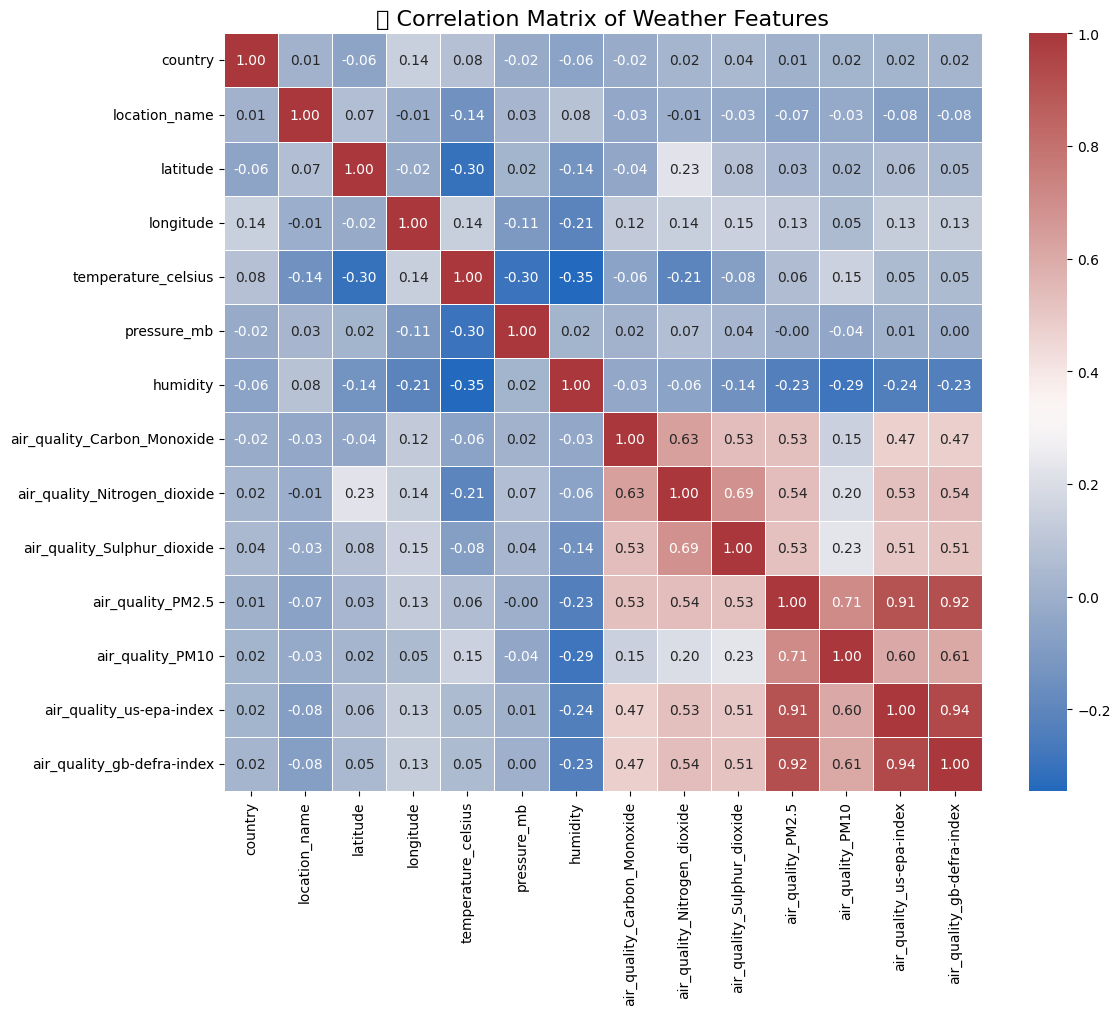

🔴 Các thuộc tính có tương quan mạnh với air_quality_PM2.5 (|corr| > 0.7):
air_quality_PM2.5               1.000000
air_quality_gb-defra-index      0.917920
air_quality_us-epa-index        0.908520
air_quality_PM10                0.707086
air_quality_Nitrogen_dioxide    0.536226
air_quality_Carbon_Monoxide     0.530964
air_quality_Sulphur_dioxide     0.525853
humidity                       -0.232320
Name: air_quality_PM2.5, dtype: float64

🟢 Các thuộc tính có tương quan rất yếu với air_quality_PM2.5 (|corr| < 0.1):
location_name         -0.065879
pressure_mb           -0.002669
country                0.007707
latitude               0.034486
temperature_celsius    0.055872
Name: air_quality_PM2.5, dtype: float64


In [ ]:
df_weather = df.copy()

# Convert 'visibility' to numeric, coercing errors to NaN

# Label encode categorical columns (convert strings to numbers)
for col in df_weather.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_weather[col] = le.fit_transform(df_weather[col])

# Subset the DataFrame

# Select only numeric columns for correlation calculation
numeric_cols = df_weather.select_dtypes(include=np.number).columns
df_weather_numeric = df_weather[numeric_cols]

# Compute correlation matrix
corr = df_weather_numeric.corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f", square=True, linewidths=0.5)
plt.title("🔗 Correlation Matrix of Weather Features", fontsize=16)
plt.tight_layout()
plt.show()

saleprice_corr = corr["air_quality_PM2.5"]  # bỏ chính nó

# Lọc các thuộc tính có tương quan mạnh |corr| > 0.5
strong_corr = saleprice_corr[abs(saleprice_corr) > 0.2].sort_values(ascending=False)
print("🔴 Các thuộc tính có tương quan mạnh với air_quality_PM2.5 (|corr| > 0.7):")
print(strong_corr)

# Lọc các thuộc tính có tương quan rất yếu |corr| < 0.1
weak_corr = saleprice_corr[abs(saleprice_corr) < 0.1].sort_values()
print("\n🟢 Các thuộc tính có tương quan rất yếu với air_quality_PM2.5 (|corr| < 0.1):")
print(weak_corr)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84796 entries, 186 to 85107
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       84796 non-null  object        
 1   location_name                 84796 non-null  object        
 2   latitude                      84796 non-null  float64       
 3   longitude                     84796 non-null  float64       
 4   last_updated                  84796 non-null  datetime64[ns]
 5   temperature_celsius           84796 non-null  float64       
 6   pressure_mb                   84796 non-null  float64       
 7   humidity                      84796 non-null  int64         
 8   air_quality_Carbon_Monoxide   84796 non-null  float64       
 9   air_quality_Nitrogen_dioxide  84796 non-null  float64       
 10  air_quality_Sulphur_dioxide   84796 non-null  float64       
 11  air_quality_PM2.5             8

In [ ]:
# === Load data ===
# df = pd.read_csv('your_file.csv')

# === Xử lý cột thời gian ===
df['hour'] = df['last_updated'].dt.hour
df['day'] = df['last_updated'].dt.day
df['month'] = df['last_updated'].dt.month
print(df.describe())
# === Chọn đặc trưng và target ===
features = [
    'latitude', 'longitude','air_quality_Carbon_Monoxide','air_quality_Nitrogen_dioxide',
    'hour', 'day', 'month','air_quality_Sulphur_dioxide','air_quality_us-epa-index','air_quality_gb-defra-index','air_quality_PM10'
]
target = 'air_quality_PM2.5'


X = df[features]
y = df[target]

# === Train/test split (không shuffle để giữ cấu trúc time series) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape)
print(X_test.shape)
# === Xác định loại dữ liệu ===
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# === Tiền xử lý ===
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# === Tạo 3 mô hình ===
model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

# === Huấn luyện ===
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# === Hàm đánh giá ===
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")
    return preds

# === Kết quả ===
print("Linear Regression:")
evaluate(model_lr, X_test, y_test)

print("\nRandom Forest:")
evaluate(model_rf, X_test, y_test)

print("\nXGBoost:")
evaluate(model_xgb, X_test, y_test)


           latitude     longitude                   last_updated  \
count  84796.000000  84796.000000                          84796   
mean      19.184218     22.110346  2024-12-22 03:00:39.270720512   
min      -41.300000   -175.200000            2024-05-16 01:45:00   
25%        3.750000     -6.836100            2024-09-04 08:00:00   
50%       17.250000     23.316700            2024-12-22 11:15:00   
75%       40.400000     50.580000            2025-04-10 17:15:00   
max       64.150000    179.220000            2025-07-28 21:30:00   
std       24.437786     65.784224                            NaN   

       temperature_celsius   pressure_mb      humidity  \
count         84796.000000  84796.000000  84796.000000   
mean             22.615017   1013.956283     63.719987   
min             -24.900000    947.000000      2.000000   
25%              17.600000   1010.000000     46.000000   
50%              25.000000   1013.000000     69.000000   
75%              28.400000   1017.00000

array([ 50.193886 , 107.62458  ,  29.169268 , ...,  13.0661545,
         7.893341 ,   4.6245775], dtype=float32)

RMSE: 9.0256
R^2: 0.9128
RMSE: 4.6490
R^2: 0.9769
RMSE: 4.8965
R^2: 0.9743


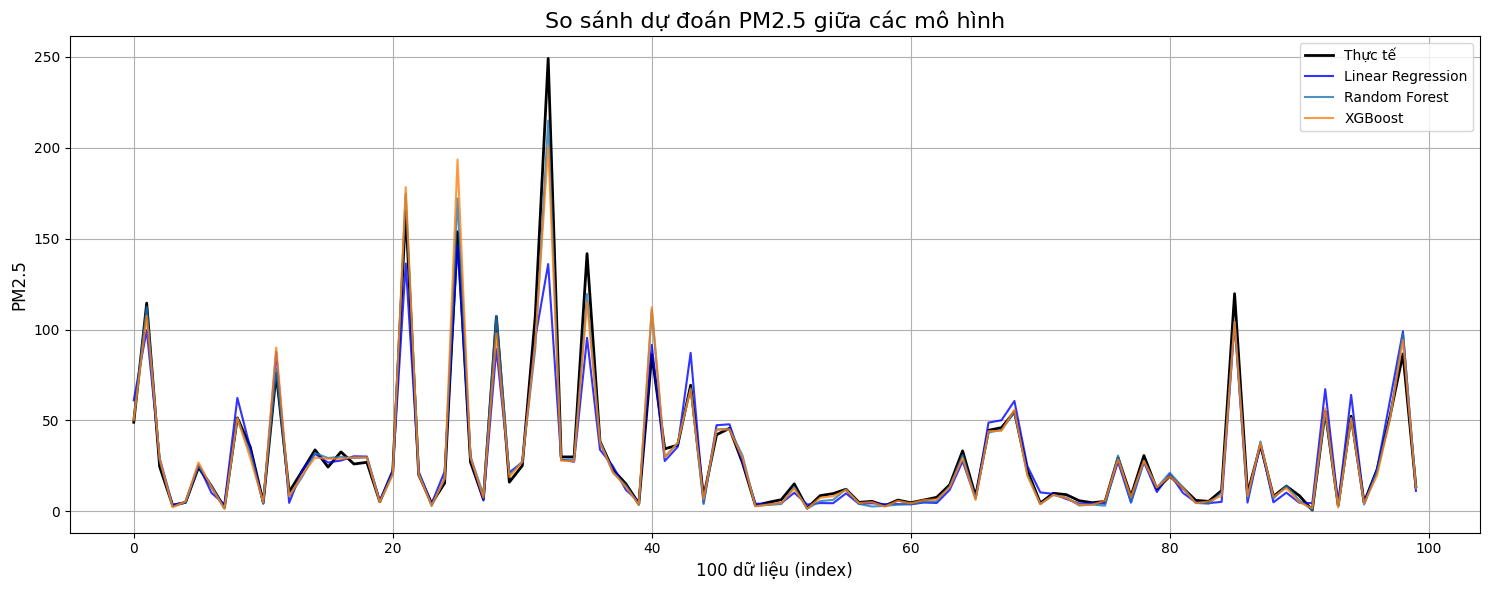

In [ ]:
import matplotlib.pyplot as plt

# Lấy dự đoán từ cả 3 mô hình
preds_lr = evaluate(model_lr, X_test, y_test)
preds_rf = evaluate(model_rf, X_test, y_test)
preds_xgb = evaluate(model_xgb, X_test, y_test)

# Tạo trục thời gian theo index của tập test
time_index = X_test.index

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Thực tế', color='black', linewidth=2)
plt.plot(preds_lr[:100], label='Linear Regression',color='blue' ,alpha=0.8)
plt.plot(preds_rf[:100], label='Random Forest', alpha=0.8)
plt.plot(preds_xgb[:100], label='XGBoost', alpha=0.8)
plt.title('So sánh dự đoán PM2.5 giữa các mô hình', fontsize=16)
plt.xlabel('100 dữ liệu (index)', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

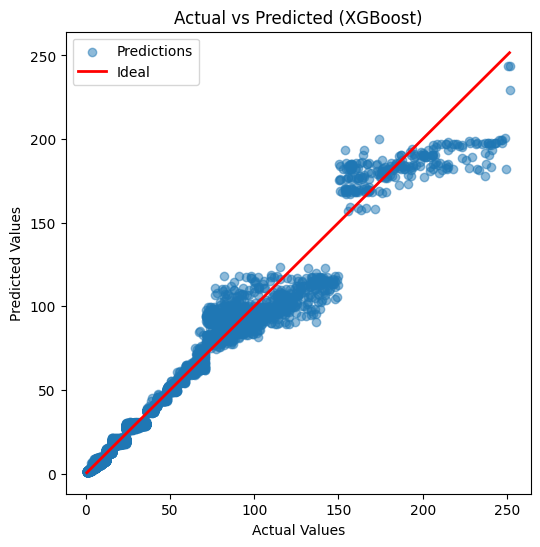

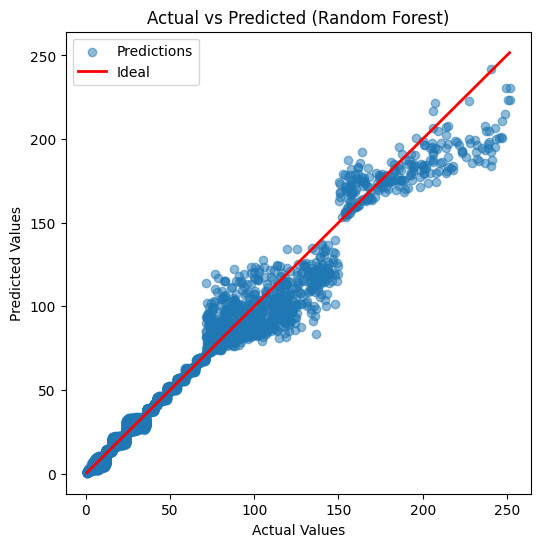

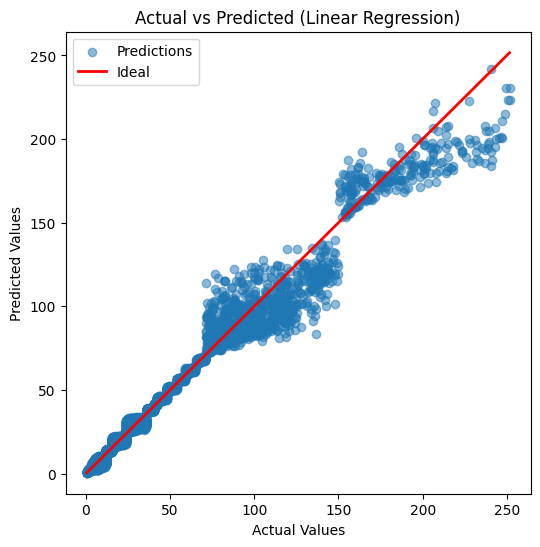

In [ ]:
preds_xgb = model_xgb.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds_xgb, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (XGBoost)')
plt.legend()
plt.show()

# 2️⃣ Random Forest
preds_rf = model_rf.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()
plt.show()

# 2️⃣ Random Forest
preds_lr = model_lr.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.legend()
plt.show()


Huấn luyện LSTM + Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

# === TimeSeriesSplit cho cross-validation ===
tscv = TimeSeriesSplit(n_splits=5)

# === Linear Regression (ít tham số, có thể thêm regularization Ridge/Lasso) ===
param_grid_lr = {
    'regressor': [LinearRegression(), Ridge(), Lasso()],
    'regressor__fit_intercept': [True, False],
}
grid_lr = GridSearchCV(
    model_lr,
    param_grid_lr,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
print("Best Linear Regression params:", grid_lr.best_params_)

# === Random Forest ===
param_grid_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}
grid_rf = RandomizedSearchCV(
    model_rf,
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
grid_rf.fit(X_train, y_train)
print("Best Random Forest params:", grid_rf.best_params_)

# === XGBoost ===
param_grid_xgb = {
    'regressor__n_estimators': [50,100],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.2, 0.5]
}
grid_xgb = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_grid_xgb,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
grid_xgb.fit(X_train, y_train)
print("Best XGBoost params:", grid_xgb.best_params_)

# === Evaluate best models ===
print("\nBest Linear Regression:")
evaluate(grid_lr.best_estimator_, X_test, y_test)

print("\nBest Random Forest:")
evaluate(grid_rf.best_estimator_, X_test, y_test)

print("\nBest XGBoost:")
evaluate(grid_xgb.best_estimator_, X_test, y_test)


Best Linear Regression params: {'regressor': Lasso(), 'regressor__fit_intercept': True}
Best Random Forest params: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Best XGBoost params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 50, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0, 'regressor__colsample_bytree': 1.0}

Best Linear Regression:
RMSE: 9.3957
R^2: 0.9055

Best Random Forest:
RMSE: 4.5309
R^2: 0.9780

Best XGBoost:
RMSE: 4.7111
R^2: 0.9762


array([ 50.540783 , 108.99797  ,  29.55779  , ...,  12.982248 ,
         7.6094627,   3.8754315], dtype=float32)

In [ ]:
#Tuning hyperparameter
# LSTM - Dự đoán chỉ số PM 2.5 trong 7 ngày tới
# Biểu đồ hiển thị chỉ số PM 2.5

# Task
Code an LSTM model to predict the PM 2.5 index for the next 7 days, allowing the user to input the number of days to predict. Explain any errors in the provided code, fix them if possible, and incorporate the changes. If fixing is not possible, diagnose the error. Modify the selected empty cell based on the requirements and include the modified cell id(s) in the response.

## Prepare data for lstm

### Subtask:
Create sequences and target variables for the LSTM model.


**Reasoning**:
Create sequences and target variables for the LSTM model using the specified steps.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
import pandas as pd # Assuming pandas is needed for date manipulation later
from sklearn.model_selection import train_test_split

country_name = input("Nhập tên quốc gia (vd: Vietnam): ")
df_country = df[df['country'] == country_name].copy()

# Chuẩn bị dữ liệu cho LSTM (chỉ lấy PM2.5 của quốc gia đó)
data = df_country['air_quality_PM2.5'].values.reshape(-1, 1) # Reshape for scaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

# Define the lookback window size (e.g., 7 days)
lookback_window = 7

# Apply the function to create sequences and target variables
X, y = create_sequences(scaled_data, lookback_window)

# Reshape the input sequences for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets (80/20 split, no shuffle)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Shape of X_train_lstm:", X_train_lstm.shape)
print("Shape of X_test_lstm:", X_test_lstm.shape)
print("Shape of y_train_lstm:", y_train_lstm.shape)
print("Shape of y_test_lstm:", y_test_lstm.shape)

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(lookback_window, 1)),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)  # Dự đoán giá trị PM2.5 tiếp theo
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=10,
    batch_size=16,
    verbose=1
)

# =====================
# 3. Hàm dự đoán 7 ngày tới
# =====================
def predict_next_days(model, last_sequence, days=7):
    predictions = []
    seq = last_sequence.copy()
    for _ in range(days):
        # Reshape for prediction
        pred = model.predict(seq.reshape(1, lookback_window, 1), verbose=0)
        predictions.append(pred[0,0])
        # Update sequence (slide window)
        seq = np.append(seq[1:], pred).reshape(lookback_window, 1)
    # Inverse transform to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
    return predictions

# Get the last sequence from the test data to make predictions
last_sequence = X_test_lstm[-1]
future_preds = predict_next_days(model, last_sequence, days=7)

print("\n📌 Dự đoán PM2.5 trong 7 ngày tới:")
print(future_preds.flatten())

Nhập tên quốc gia (vd: Vietnam): Vietnam
Shape of X_train_lstm: (648, 7, 1)
Shape of X_test_lstm: (163, 7, 1)
Shape of y_train_lstm: (648,)
Shape of y_test_lstm: (163,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0711 - val_loss: 0.0281
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0329 - val_loss: 0.0290
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0333 - val_loss: 0.0279
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0308 - val_loss: 0.0285
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0296 - val_loss: 0.0298
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0312 - val_loss: 0.0283
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0338 - val_loss: 0.0289
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0305 - val_loss: 0.0286
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0314 - val_loss: 0.0286
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0332 - val_loss: 0.0289

📌 Dự đoán PM2.5 trong 7 ngày tới:
[69.665535 76.50936  77.67988  78.874016 78.718475 74.30787  74.49395 ]
